In [ ]:
# Standard Libraries
import shutil
import urllib.request as urlrequest
from collections import Counter
from pathlib import Path
from pprint import pprint
from zipfile import ZipFile
import zipfile
from datetime import datetime
from dateutil import parser
import datetime
import ast
import json
# 3rd-party Libraries
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as pyo
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

raw_df = pd.read_csv('matched_pairs_2.csv')
new_df = pd.read_csv('prepost_w_times.csv')


In [ ]:
raw_df.columns

Index(['pre=1 post=2', 'userID', 'index post', 'index pre', 'teacher',
       'player code',
       'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?',
       'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?',
       'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?',
       'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?',
       'Click the button that shows how confident you are that you c

In [ ]:
label_to_value = {
    'Definitely true': 3,
    'A little bit false': -1,
    'A little bit true': 1,
    'Mostly true': 2,
    'Mostly false': -2,
    'Definitely false': -3
}
label_to_value_inverse = {
    'Definitely true': -3,
    'A little bit false': 1,
    'A little bit true': -1,
    'Mostly true': -2,
    'Mostly false': 2,
    'Definitely false': 3
}

number_to_value = {
    6:3,
    5:2,
    4:1,
    3:-1,
    2:-2,
    1:-3
}

# Replace the labels with corresponding values
raw_df[['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.',
        'Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.',
        'Click the button that best describes how true or false each statement is for you. - I consider myself a science person.',
         'Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.',
         'Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.',
        'Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.',
        'Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']] = raw_df[['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.',
        'Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.',
        'Click the button that best describes how true or false each statement is for you. - I consider myself a science person.',
         'Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.',
         'Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.',
        'Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.',
        'Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']].replace(label_to_value)

# Need inverse labels
raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] = raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'].replace(label_to_value_inverse)

# replace numbers
raw_df[['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']] = raw_df[['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?',
        'Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']].replace(number_to_value)

In [ ]:

raw_df['Identity'] = raw_df['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I consider myself a science person.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.']
raw_df['Identity'] = raw_df['Click the button that best describes how true or false each statement is for you. - Being involved in science is a key part of who I am.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can see science-related activities as being a part of my future.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I consider myself a science person.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I can imagine myself being involved in a science-related career.']

raw_df['Interest'] = raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']
raw_df['Interest'] = raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about nature.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I have no interest in learning about the environment.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I would like to learn more about environmental science.'] + raw_df['Click the button that best describes how true or false each statement is for you. - I am interested in learning about ecosystems.']

raw_df['Self-efficacy'] = raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']
raw_df['Self-efficacy'] = raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate what causes change in an environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can do the kinds of things that scientists do?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can look at data that you collect and notice patterns?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the relationships between organisms and their environment?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the reasons why things happen in nature?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can use tables and graphs to figure things out?'] + raw_df['Click the button that shows how confident you are that you can do the following science tasks.\n\n\n\nHow confident are you... - ... that you can investigate the kinds of problems that an ecosystem scientist would investigate?']

raw_df = raw_df[raw_df['Try?'] != False]

In [ ]:
pre_df = raw_df[raw_df['pre=1 post=2'] == 1]
post_df = raw_df[raw_df['pre=1 post=2'] == 2]

In [ ]:
new_df_1 = new_df.rename(columns={'Q3': 'userID'})
new_post = post_df.merge(new_df_1[['userID', 'Duration (in seconds)']], on='userID', how='left')
new_post['Duration (in seconds)'] = new_post['Duration (in seconds)'].astype(int)


#Filtering
As we raise the threshold for time, Total score and most other categories gain a more significant p value

In [ ]:
filtered_pre = pre_df[pre_df['Krystal heard a news story about a new fish called Asian silver carp that has come into Lake Erie. In the news story, Krystal learned that Asian silver carp eat small plants and animals. Even though Asian silver carp do not eat other fish, they are still causing the populations of some fish to change in the lake. She found a data table on the change in populations of three different fish after the Asian silver carp came into Lake Erie.\n     \n\n\n\nUse the patterns in the data table to write a scientific explanation on whether the Asian silver carp affect the different fish populations in Lake Erie in the same way.\n\n\n\nYour explanation should include:\n\n1. A claim that states whether the Asian silver carp will affect all the fish (shad, shiner, and smallmouth bass) in the same way.\n\n2. Evidence from the data table about how the Asian silver carp affects the population of shad, shiner, and smallmouth bass.\n\n3. Reasoning that describes the types of relationships that exists between the Asian silver carp and the three fish in the data table.'] != '0']
filtered_post = new_post[new_post['Krystal heard a news story about a new fish called Asian silver carp that has come into Lake Erie. In the news story, Krystal learned that Asian silver carp eat small plants and animals. Even though Asian silver carp do not eat other fish, they are still causing the populations of some fish to change in the lake. She found a data table on the change in populations of three different fish after the Asian silver carp came into Lake Erie.\n     \n\n\n\nUse the patterns in the data table to write a scientific explanation on whether the Asian silver carp affect the different fish populations in Lake Erie in the same way.\n\n\n\nYour explanation should include:\n\n1. A claim that states whether the Asian silver carp will affect all the fish (shad, shiner, and smallmouth bass) in the same way.\n\n2. Evidence from the data table about how the Asian silver carp affects the population of shad, shiner, and smallmouth bass.\n\n3. Reasoning that describes the types of relationships that exists between the Asian silver carp and the three fish in the data table.'] != '0']
filtered_post = filtered_post[
    (filtered_post['Duration (in seconds)'] > 600) &
    (filtered_post['Duration (in seconds)'] < 1000000)
]

In [ ]:
paired_df = pd.merge(filtered_pre, filtered_post, on='userID', how='inner')


##T Tests (pairwise)

In [ ]:
pre_paired = paired_df[paired_df['pre=1 post=2_x'] == 1]
post_paired = paired_df[paired_df['pre=1 post=2_y'] == 2]

JG_pre = pre_paired[pre_paired['teacher_x'] == 'JG']
JG_post = post_paired[post_paired['teacher_y'] == 'JG']

JS_pre = pre_paired[pre_paired['teacher_x'] == 'JS']
JS_post = post_paired[post_paired['teacher_y'] == 'JS']

ML_pre = pre_paired[pre_paired['teacher_x'] == 'ML']
ML_post = post_paired[post_paired['teacher_y'] == 'ML']

RB_pre = pre_paired[pre_paired['teacher_x'] == 'RB']
RB_post = post_paired[post_paired['teacher_y'] == 'RB']

wo_rb_pre = pre_paired[pre_paired['teacher_x'] != 'RB']
wo_rb_post = post_paired[post_paired['teacher_y'] != 'RB']

In [ ]:
def ttest(pre, post):
    print(f"Total Score: {ttest_rel(pre['Total Score_x'], post['Total Score_y'])}\n")
    print(f"Identity: {ttest_rel(pre['Identity_x'], post['Identity_y'])}\n")
    print(f"Self efficacy: {ttest_rel(pre['Self-efficacy_x'], post['Self-efficacy_y'])}\n")
    print(f"Interest: {ttest_rel(pre['Interest_x'], post['Interest_y'])}\n")


In [ ]:
# After filtering was done
ttest(pre_paired, post_paired)

Total Score: TtestResult(statistic=-2.4023864930260723, pvalue=0.01760913412123456, df=139)

Identity: TtestResult(statistic=-1.4880010316527106, pvalue=0.13901575203254907, df=139)

Self efficacy: TtestResult(statistic=-2.4978493820674874, pvalue=0.013660924132157257, df=139)

Interest: TtestResult(statistic=3.0612755679879706, pvalue=0.0026462318141537494, df=139)



In [ ]:
# without RB
ttest(wo_rb_pre, wo_rb_post)

Total Score: TtestResult(statistic=-2.0972845530979494, pvalue=0.03901117464667024, df=83)

Identity: TtestResult(statistic=-1.768977256896059, pvalue=0.08057124295172227, df=83)

Self efficacy: TtestResult(statistic=-3.2832008884359594, pvalue=0.0015034003882460059, df=83)

Interest: TtestResult(statistic=1.402764955352648, pvalue=0.16441652124701886, df=83)



In [ ]:
# Teacher: JG
ttest(JG_pre, JG_post)

Total Score: TtestResult(statistic=1.3199745817482005, pvalue=0.19983093170953006, df=23)

Identity: TtestResult(statistic=-1.6220753387772286, pvalue=0.11841658774885197, df=23)

Self efficacy: TtestResult(statistic=-1.3573880309424362, pvalue=0.18782899543930748, df=23)

Interest: TtestResult(statistic=0.19950100414312466, pvalue=0.8436241166116345, df=23)



In [ ]:
# Teacher: JS
ttest(JS_pre, JS_post)

Total Score: TtestResult(statistic=-2.6829165751645556, pvalue=0.01703202454106913, df=15)

Identity: TtestResult(statistic=-1.1174133758856715, pvalue=0.281396186189163, df=15)

Self efficacy: TtestResult(statistic=-1.3616829493113218, pvalue=0.1934007018660934, df=15)

Interest: TtestResult(statistic=-0.1865550434127628, pvalue=0.8545091788012279, df=15)



In [ ]:
# Teacher: ML
ttest(ML_pre, ML_post)

Total Score: TtestResult(statistic=-2.981577510663929, pvalue=0.004706976628372127, df=43)

Identity: TtestResult(statistic=-0.6948431603922282, pvalue=0.49089135973344045, df=43)

Self efficacy: TtestResult(statistic=-2.6574794697126776, pvalue=0.011006809696699692, df=43)

Interest: TtestResult(statistic=1.8376231213335015, pvalue=0.07303395246254, df=43)



In [ ]:
# Teacher: RB
ttest(RB_pre, RB_post)

Total Score: TtestResult(statistic=-1.2043346465697438, pvalue=0.23361749168914872, df=55)

Identity: TtestResult(statistic=-0.4374122640093237, pvalue=0.663525225371453, df=55)

Self efficacy: TtestResult(statistic=0.16234769751734004, pvalue=0.8716270461589475, df=55)

Interest: TtestResult(statistic=3.179860916312767, pvalue=0.002420889070171905, df=55)



##Histograms for normalcy

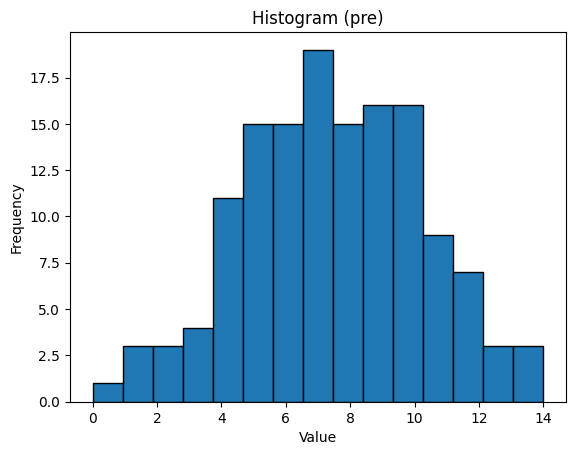

7.507142857142857


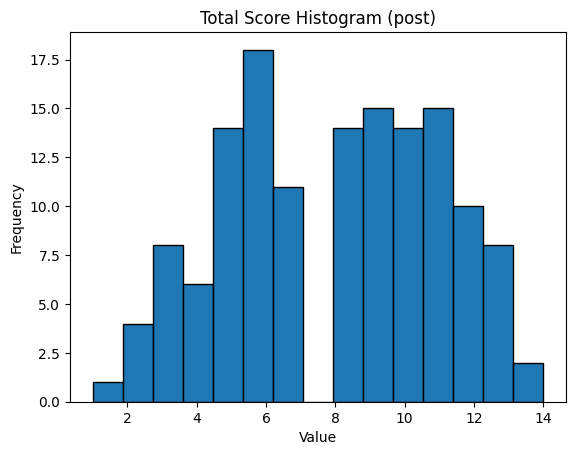

7.9714285714285715


In [ ]:
plt.hist(pre_paired['Total Score_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (pre)')
plt.show()
print(pre_paired['Total Score_x'].mean())
plt.hist(post_paired['Total Score_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Total Score Histogram (post)')
plt.show()
print(post_paired['Total Score_y'].mean())

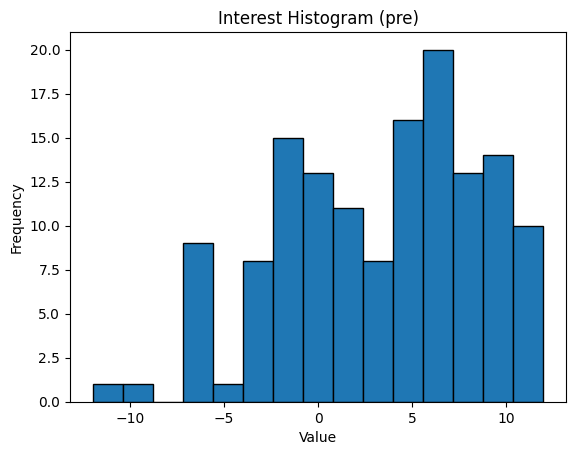

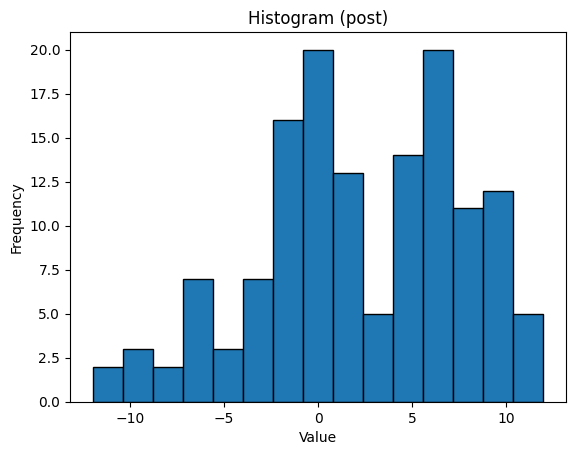

3.2714285714285714
2.1714285714285713


In [ ]:
plt.hist(pre_paired['Interest_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Interest Histogram (pre)')
plt.show()
plt.hist(post_paired['Interest_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Interest_x'].mean())
print(post_paired['Interest_y'].mean())


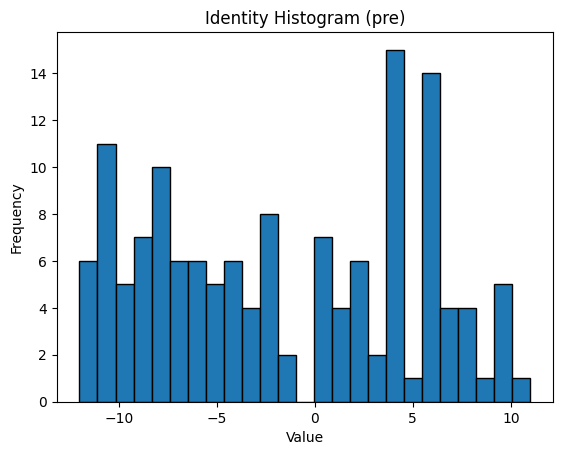

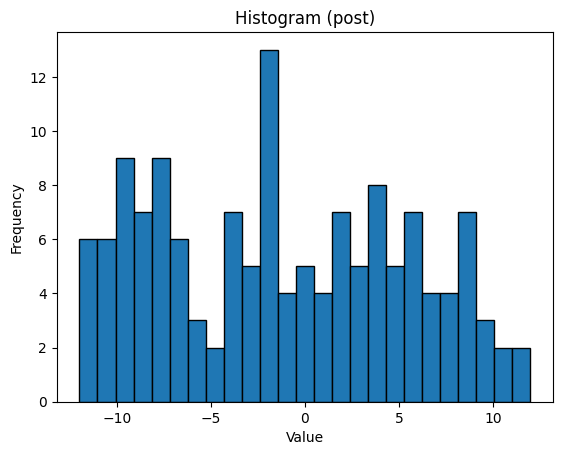

-1.7285714285714286
-1.25


In [ ]:
plt.hist(pre_paired['Identity_x'], bins=25, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Identity Histogram (pre)')
plt.show()
plt.hist(post_paired['Identity_y'], bins=25, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Identity_x'].mean())
print(post_paired['Identity_y'].mean())


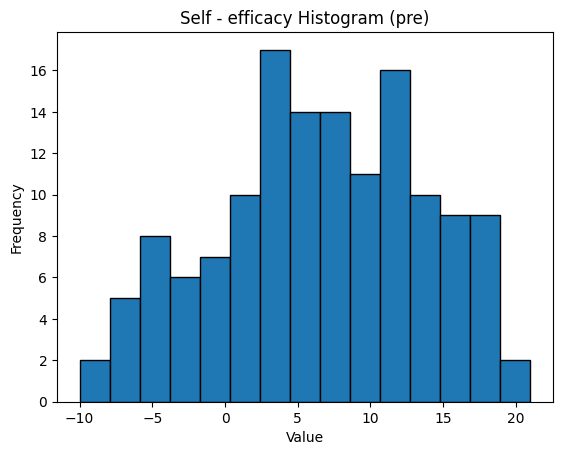

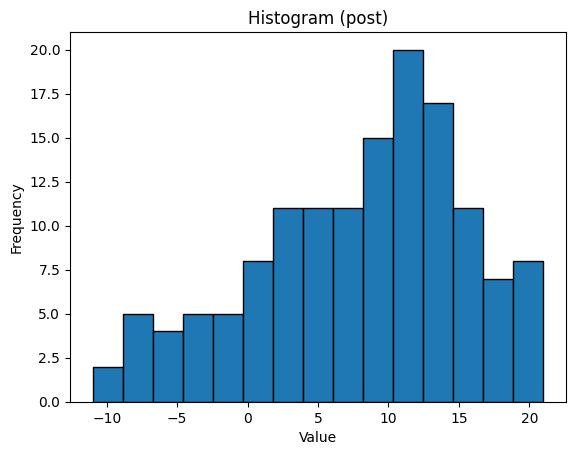

6.5
7.992857142857143


In [ ]:
plt.hist(pre_paired['Self-efficacy_x'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Self - efficacy Histogram (pre)')
plt.show()
plt.hist(post_paired['Self-efficacy_y'], bins=15, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram (post)')
plt.show()
print(pre_paired['Self-efficacy_x'].mean())
print(post_paired['Self-efficacy_y'].mean())


#Independent

In [ ]:
paired_df = pd.merge(filtered_pre, filtered_post, on='userID', how='inner')

In [ ]:
pre_paired = paired_df[paired_df['pre=1 post=2_x'] == 1]
post_paired = paired_df[paired_df['pre=1 post=2_y'] == 2]

ttest_rel(pre_paired['Total Score_x'], post_paired['Total Score_y'])

TtestResult(statistic=-2.4023864930260723, pvalue=0.01760913412123456, df=139)